In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [5]:
#Creating second dataframe for simplified chart
dfs = df[["race","gender","age","diabetesMed","readmitted"]]
dfs.head()

,race,gender,age,diabetesMed,readmitted
0,Caucasian,Female,[0-10),No,NO
1,Caucasian,Female,[10-20),Yes,>30
2,AfricanAmerican,Female,[20-30),Yes,NO
3,Caucasian,Male,[30-40),Yes,NO
4,Caucasian,Male,[40-50),Yes,NO


In [6]:
dfs.groupby(["race"])["race"].count()

,race
race,
?,2273
AfricanAmerican,19210
Asian,641
Caucasian,76099
Hispanic,2037
Other,1506


In [62]:
#Split the data into gender and age and make the race consistent so no other factors disturb the result
maleC1=dfs[(dfs["gender"]=="Male")&(dfs["race"]=="Caucasian")]
femaleC1 = dfs[(dfs["gender"]=="Female")&(dfs["race"]=="Caucasian")]
maleC2=maleC1.sort_values("age")
femaleC2 = femaleC1.sort_values("age")

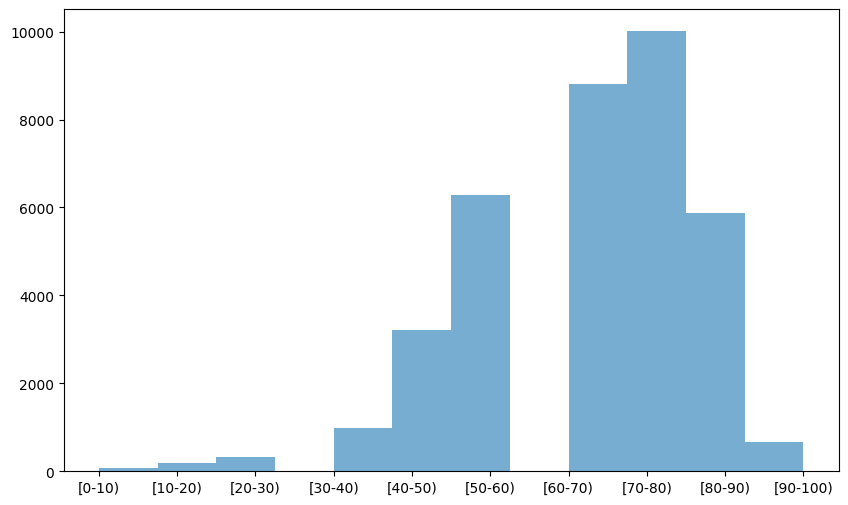

,race,gender,age,diabetesMed,readmitted
count,36410,36410,36410,36410,36410
unique,1,1,10,2,3
top,Caucasian,Male,[70-80),Yes,NO
freq,36410,36410,10007,28280,19742


In [60]:
#Make the graph for gender ratio
mp.figure(figsize = (10,6))
mp.hist((maleC2["age"]), bins = 12, alpha = 0.6,density = False)
mp.show()
maleC2.describe()

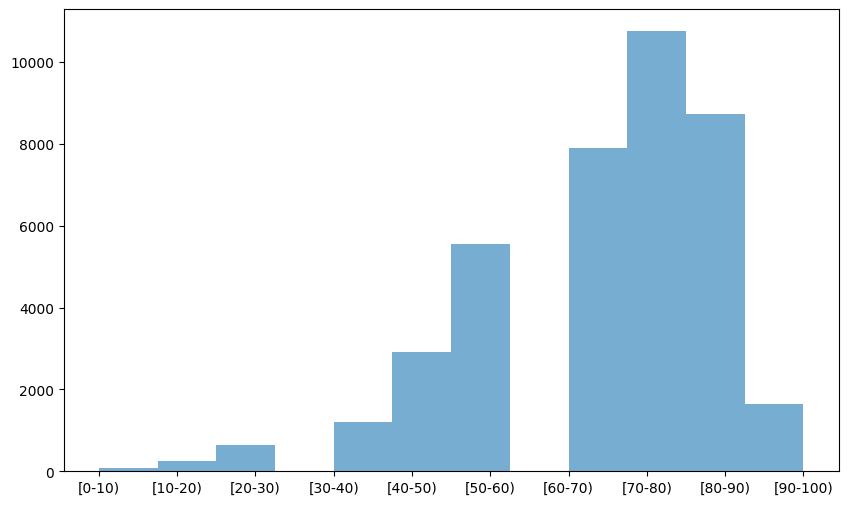

,race,gender,age,diabetesMed,readmitted
count,39689,39689,39689,39689,39689
unique,1,1,10,2,3
top,Caucasian,Female,[70-80),Yes,NO
freq,39689,39689,10754,30170,20641


In [61]:
#Create a female age graph
mp.figure(figsize = (10,6))
mp.hist((femaleC2["age"]), bins = 12, alpha = 0.6,density = False)
mp.show()
femaleC2.describe()

In [ ]:
#After setting out to find which gender is more likely to get diabetes and if age is a factor I found a dissapointing little to no difference. The average is overwhelmingly [70-80) in both Caucasian females and caucasian Males. This dataset is a lot cleaner than the last, so I can at least believe a little that these results count for the population of whereever this is from.